# Gradient Boosting Model

### * Model boosting_750 *  ---> (RMSE=594.1696)

#### Load the data

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [2]:
cleantrain_df = pd.read_csv("../inputs/cleantrain.csv", index_col = 0)
cleantrain_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,0,0,3,62.8,56.0,4.29,4.31,2.70,605
1,0.34,1,1,2,62.6,55.0,4.46,4.49,2.80,565
2,0.40,0,2,2,60.3,62.0,4.70,4.75,2.85,720
3,0.40,2,3,4,61.8,59.2,4.72,4.74,2.92,793
4,0.90,0,2,2,61.0,63.0,6.10,6.13,3.73,4381


In [3]:
cleanpredict_df = pd.read_csv("../inputs/cleanpredict.csv", index_col = 0)
cleanpredict_df.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,2.36,0,0,3,60.8,54.0,8.68,8.57,5.24
1,2.04,1,1,2,62.0,56.0,8.18,8.23,5.09
2,0.51,0,2,2,61.7,54.0,5.18,5.19,3.20
3,0.30,2,3,4,61.3,56.0,4.32,4.33,2.65
4,0.96,0,2,2,68.8,56.0,6.11,5.98,4.16


In [4]:
X = cleantrain_df.drop(columns=["price"])
y = cleantrain_df["price"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32364, 9) (8091, 9) (32364,) (8091,)


#### Apply the model

In [6]:
model = GradientBoostingRegressor(n_estimators=750)
fitted_model = model.fit(X, y)

In [7]:
y_pred = fitted_model.predict(cleanpredict_df)
y_pred

array([21984.65956799, 19536.95522041,  1487.12757315, ...,
        4185.68701848,   872.27144994,  1577.64579071])

In [8]:
upload_df = pd.DataFrame({
    'price' : y_pred
})
upload_df.index.rename("id",inplace = True)
upload_df.head()

,price
id,
0,21984.659568
1,19536.955220
2,1487.127573
3,549.372561
4,4653.169928


In [9]:
upload_df.to_csv("./Output/predictions_gradientboosting_regression_prueba1.csv", header=True)

#### Uploaded

### Graph

In [14]:
y_test.shape

(8091,)

In [18]:
y_pred = fitted_model.predict(X_test)
y_pred.shape

(8091,)

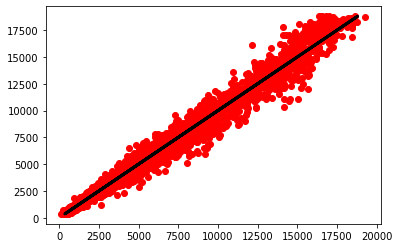

In [19]:
plt.scatter(y_pred, y_test,  color='red')
plt.plot(y_test, y_test, color='black', linewidth=3)
plt.show()